# Домашняя работа 4. Кластеризация.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.
4. Пришлите на почту ml-teachers ссылку на этот файл в вашем репозитории.
5. В теме письма указать `ML Homework #4: Name Surname`. Если тема будет неправильная, то задание не будет проверено.

**Дедлайн**: 19.11.2017 00:00 OMSK

    После дедлайна можно сдать, но вы получите штраф по баллам в рейтинге.

**Рассылка решений**: 23.11.2017 17:00 OMSK

    После рассылки задания совсем не имеют веса.

### Полезная литература

- [Интересные алгоритмы кластеризации, часть первая: Affinity propagation](https://habrahabr.ru/post/321216/) и другие статьи цикла
- [Глава 7: кластеризация и визуализация. К. В. Воронцов](http://www.machinelearning.ru/wiki/images/6/6d/Voron-ML-1.pdf)
- [Документация sklearn.clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [K-Means Clustering - The Math of Intelligence. Siraj Raval](https://www.youtube.com/watch?v=9991JlKnFmk) объяснение с программированием KMeans вручную

In [20]:
#!pip3 install numpy pandas scipy sklearn matplotlib seaborn Pillow scikit-image

## 1. Изображения (6 баллов)

С помощью алгоритмов кластеризации можно уменьшить число цветов в изображении. В данном случае будут кластеризоваться похожие пиксели. Такой подход позволяет перейти к суперпиксельному представлению изображений, которое является более компактным и используется в задачах компьютерного зрения.

Загрузим картинку `data/bird.jpg` с помощью scikit-image и выведите ее с помощью matplotlib.

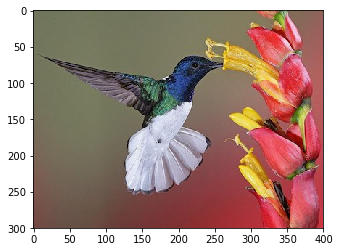

In [21]:
%matplotlib inline
import skimage
from matplotlib import pyplot as plt
import numpy as np

np.random.seed(seed=42)

img = skimage.io.imread("bird.jpg")
plt.imshow(img)

### 1.1 Scale (0.5 балла)

Если вы посмотрите на содержимое numpy массива, в котором хранится изображение, то увидите, что там будут числа от 0 до 255. Нам лучше перейти к числам от 0 до 1. 

**Преобразуйте вашу матрицу, как сказано выше.**

**Hint**: Это можно сделать с помощью функции `skimage.img_as_float`.

In [22]:
i = skimage.img_as_float(img)

### 1.2 Reshape (1 балл)

Мы получили матрицу размера `(300, 400, 3)`. Нам это не подходит. Чтобы запустить kMeans нам нужно иметь много-много объектов и 3 признака - значение яркости пикселя в канале Red, Green и Blue. 

**Преобразуйте матрицу так, чтобы получилась матрица размера `(120000, 3)`. **

**Hint**: Вам пригодятся функции: `np.ravel` и `np.vstack`.

In [23]:
i = np.vstack(i)

### 1.3 Train (0.5 балла)

Отлично. У нас есть подготовленные данные. Теперь мы будем находить кластеры похожих пикселей по цвету. Для этого создайте KMeans для, например, 8 цветов. **Обучите модель** (может занять около 10 секунд). С помощью магического макроса `%time` **покажите, сколько времени у вас занимало обучение**.

In [24]:
from sklearn.cluster import KMeans

%timeit ik = KMeans(n_clusters=8,n_init=1).fit(i)

ik.cluster_centers_

1.26 s ± 379 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


array([[ 0.48404717,  0.4566035 ,  0.3730316 ],
       [ 0.80308933,  0.79826539,  0.86924403],
       [ 0.81819256,  0.33382956,  0.35767683],
       [ 0.57413125,  0.22034611,  0.22429051],
       [ 0.86526696,  0.72396394,  0.31352833],
       [ 0.15643488,  0.14381851,  0.16702661],
       [ 0.40418452,  0.3255017 ,  0.29829757],
       [ 0.72847884,  0.58138287,  0.64002935]])

### 1.4 Draw centroids (1 балл)

**Нарисуйте с помощью imshow центры кластеров**: будет 8 пикселей со средним цветом по всему кластеру. 
Это называется цветовой палитрой. 

**Hint**: reshape в 3 мерный массив, так как у вас будет 2-мерный

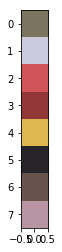

In [25]:
plt.imshow(ik.cluster_centers_.reshape((8,1,3)))

### 1.5 Draw final image (3 балла)

У нас есть значения цвета для каждого центра кластера. Каждый пиксель в результате обучения KMeans теперь имеет свой лейбл кластера. Значит мы можем заменить все пиксели на соответсвующие им центры класетров. Проведите это преобразование и выведите 8-цветное изображение.

**Hints**: `labels_`, `reshape`, `copy`, логические маски в numpy `arr[arr == 1] = 0`. У меня это 7 строк кода.

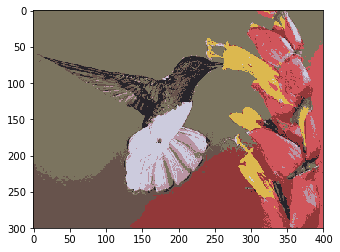

In [26]:
plt.imshow( ik.cluster_centers_[ik.labels_].reshape((300,400,3)) )
#В одну, индексанция,np, документация

## 2. Центры кластеров (6 баллов)

Представим, что международное круизное агентство Carnival Cruise Line решило себя разрекламировать с помощью баннеров и обратилось для этого к вам. Чтобы протестировать, велика ли от таких баннеров польза, их будет размещено всего 20 штук по всему миру. Вам надо выбрать 20 таких локаций для размещения, чтобы польза была большой и агентство продолжило с вами сотрудничать.

Агентство крупное, и у него есть несколько офисов по всему миру. Вблизи этих офисов оно и хочет разместить баннеры — легче договариваться и проверять результат. Также эти места должны быть популярны среди туристов.

Для поиска оптимальных мест воспользуемся базой данных крупнейшей социальной сети, основанной на локациях — Foursquare. Полный датасет доступен здесь: https://archive.org/details/201309_foursquare_dataset_umn. Но в `../../data/checkins.csv.gz` я подготовил данные и оставил только 100000 жлементов, иначе бы KMeans обучался пол дня.

Найдем на Google Maps координаты офисов компании:

```
33.751277, -118.188740 (Los Angeles)
25.867736, -80.324116 (Miami)
51.503016, -0.075479 (London)
52.378894, 4.885084 (Amsterdam)
39.366487, 117.036146 (Beijing)
-33.868457, 151.205134 (Sydney)
```

###  2.0 Read data (0.5 балла): 
**Загрузите датасет `checkins.csv.gz`. Выведите его размер, первые 5 строк таблицы, статистическиую сводку(describe) **

In [27]:
import pandas as pd
df = pd.read_csv('checkins.csv.gz')
print(df.shape)
print(df.head())
df.describe()

(100000, 2)
    latitude   longitude
0  38.895112  -77.036366
1  33.800745  -84.410520
2  45.523452 -122.676207
3  40.764462 -111.904565
4  33.448377 -112.074037


,latitude,longitude
count,100000.000000,100000.000000
mean,36.886388,-89.396849
std,8.351517,35.579317
min,-45.031162,-159.670833
25%,33.494170,-112.074037
50%,38.646991,-87.743938
75%,40.740389,-75.163789
max,67.631479,174.908056


###  2.1 MeanShift (1 балл): 
Для данной задачи мы не знаем сколько кластеров вообще существует, и есть ли они, поэтому воспользуемся методом, который сам находит нужное количество кластеров. Используйте `MeanShift`, указав `bandwidth=0.1`, что в переводе из градусов в метры колеблется примерно от 5 до 10 км в средних широтах. Документацию по нему вы можете найти в документации SKlearn [тут](http://scikit-learn.org/stable/modules/clustering.html#mean-shift).

**Обучите кластеризатор на всех данных.** Выполнение в 4 потока на i5 заняло 2 минуты.

In [28]:
from sklearn.cluster import MeanShift
ms = MeanShift(bandwidth=0.1).fit(df)

### 2.2 Visualization (0.5 балла): 
**Визуализируйте с помощью matplotlib все точки из датасета** так, чтобы они были разукрашены в соответсвии с кластером к которому они принадлежат. **Добавьте на ваш график ещё точки расположений офисов**, сделайте их большими и красными, чтобы было видно. Рисовать каким-то образом карту мира под точками НЕ надо.

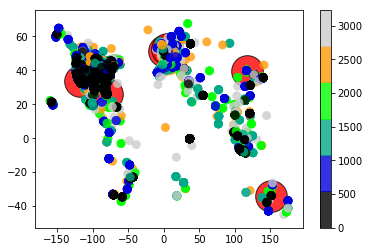

In [35]:

office = [[33.751277, -118.188740] ,
[25.867736, -80.324116],
[51.503016, -0.075479],
[52.378894, 4.885084 ],
[39.366487, 117.036146],
[-33.868457, 151.205134] ]
office = np.array(office)
plt.scatter(office[:,1],office[:,0], edgecolor='black' , c='red', alpha=0.8, s=1000)


plt.scatter(df['longitude'],df['latitude'], c=ms.labels_, cmap=plt.cm.get_cmap('nipy_spectral', 6),
          edgecolor='none', alpha=0.8, s=80)
plt.colorbar()


###  2.3 Filter clusters (2 балла): 
Как видим на графике, некоторые из получившихся кластеров содержат слишком мало точек — такие кластеры не интересны рекламодателям. Поэтому надо определить, какие из кластеров содержат, скажем, больше 15 элементов. Центры этих кластеров и являются оптимальными для размещения. 

**Выведите количество кластеров, которое удовлетворяет этому условию.**

**Hint**: `itertools.groupby`

In [30]:
### from itertools import groupby
#groupby странный какойто

cc = ms.cluster_centers_.copy()
l = ms.labels_.copy()
#ничего не даёт
#for key, group in groupby(sorted(l), lambda e: e):

np.bincount(l)[ np.bincount(l) > 15].shape[0]

592

###  Задание 2.4 (2 балла): 
Как мы помним, необходимо разместить только 20 баннеров близ офисов компании. Осталось определить 20 ближайших к ним центров кластеров. Т.е. посчитать дистанцию до ближайшего офиса для каждой точки и выбрать 20 с наименьшим значением.

**Выведите эти 20 центров кластеров, отсортрованных по возрастанию расстояния до ближайшего офиса.**

**Hint:** Для вычисления расстояния вы можете использовать обычную евклидову метрику и предполагать, что земля плоская. А можете использовать `geopy.distance.vincenty` если поймёте как.

In [31]:
import scipy
cl = cc[ np.bincount(l) > 15]
d = scipy.spatial.distance.cdist(cl,office)
md = np.min(d,axis=1)
#cl[md<0.39]#опытным путем, но ведь так не интересно, некрасиво, хотя и ответ правильный

In [32]:
mcl = np.hstack( (cl, md.reshape( md.shape[0],1 ) ) )
mcl = sorted(mcl, key=lambda a:a[2])[:20]
for cent in mcl:
    print("Banner on latitude: {a} and longatitude: {b} have a dist {c} to the nearest".format(a=cent[0],b=cent[1],c=cent[2]))
    print()

Banner on latitude: -33.86063042857143 and longatitude: 151.20477592857145 have a dist 0.007834758163107856 to the nearest

Banner on latitude: 52.37296399032261 and longatitude: 4.892317222580647 have a dist 0.009353316185992226 to the nearest

Banner on latitude: 25.8456722642857 and longatitude: -80.31889059642857 have a dist 0.022674066158385495 to the nearest

Banner on latitude: 51.502991260887086 and longatitude: -0.12553728870967767 have a dist 0.05005829482278787 to the nearest

Banner on latitude: 33.8098779552631 and longatitude: -118.14892380690813 have a dist 0.07084773242719973 to the nearest

Banner on latitude: 25.7858124199675 and longatitude: -80.2179380368254 have a dist 0.13410903336184654 to the nearest

Banner on latitude: 25.705349721052592 and longatitude: -80.28342873815798 have a dist 0.1674059642503429 to the nearest

Banner on latitude: 26.010098249285683 and longatitude: -80.19999058571432 have a dist 0.18887596060185083 to the nearest

Banner on latitude: 

In [33]:
#как насчет альтернативных подсчётов?
from geopy.distance import vincenty
vincenty(cl[0],office[2]).miles
d = np.zeros( (cl.shape[0] , office.shape[0]) )
for i in range(cl.shape[0]):
    for j in range(office.shape[0]):
        d[i,j] = vincenty(cl[i],office[j]).miles
md = np.min(d,axis=1)

In [34]:
gmcl = np.hstack( (cl, md.reshape( md.shape[0],1 ) ) )
gmcl = sorted(gmcl, key=lambda a:a[2])[:20]
for cent in gmcl:
    print("Banner on latitude: {a} and longatitude: {b} have a dist {c} to the nearest".format(a=cent[0],b=cent[1],c=cent[2]))
    print()

Banner on latitude: 52.37296399032261 and longatitude: 4.892317222580647 have a dist 0.511664342893697 to the nearest

Banner on latitude: -33.86063042857143 and longatitude: 151.20477592857145 have a dist 0.5398192609841579 to the nearest

Banner on latitude: 25.8456722642857 and longatitude: -80.31889059642857 have a dist 1.55332789996043 to the nearest

Banner on latitude: 51.502991260887086 and longatitude: -0.12553728870967767 have a dist 2.1597905384506153 to the nearest

Banner on latitude: 33.8098779552631 and longatitude: -118.14892380690813 have a dist 4.643651546969083 to the nearest

Banner on latitude: 25.7858124199675 and longatitude: -80.2179380368254 have a dist 8.692677588068095 to the nearest

Banner on latitude: 25.705349721052592 and longatitude: -80.28342873815798 have a dist 11.462413164068225 to the nearest

Banner on latitude: 33.8883253427586 and longatitude: -118.04892817172427 have a dist 12.40593818696665 to the nearest

Banner on latitude: 26.01009824928568

Таким образом вот вам список центров кластеров, так сказать

При подсчете по geopy ответ сошелся, выводы очевидны

Координата центра кластера ближайшего к какому-то из офисов компании должны быть `(52.37296399032261, 4.8923172225806466)`. Если у вас не так, то считайте, что вы сделали что-то неправильно. 